In [1]:
import numpy as np
import import_ipynb
import matplotlib.pyplot as plt
from matplotlib import cm
import aux_funcs
from PIL import Image, ImageOps

# these values can't be changed 

D_lens = 1.92e-3                                                # aperture size
focal_length = 2e-3                                             # focal length
fnum = focal_length / D_lens                                    # F-number

wvl1 = 8e-6                                                     # wavelength #1
wvl2 = 9.6e-6                                                    # wavelength #1

ma_size = 8e-6                                                  # meta atom size
ma_num = int(D_lens / ma_size)                                  # meta atoms per cross-section of aperture
ma_num_r = int(0.5 * D_lens / ma_size)                          # meta atoms per cross-section of half-aperture

# let's select pixel size in sensor plane - we try to make it a least several time smaller than wavelengths under study

du = 1e-6                                                       # pixel_size
size1 = ma_num * wvl1 * fnum                                    # size in sensor plane for wavelength #1 - such size is selected in order to maintain aperture size equal to amount of meta atoms                   
size2 = ma_num * wvl2 * fnum                                    # size for wavelength #2

num_pix1 = int(size1 / du)                                      # amount of pixels in sensor plane
num_pix2 = int(size2 / du)                                      # amount of pixels in sensor plane

apert_pix1 = int(size1 / (wvl1 * fnum))                         # we demonstrate that aperture size in pixels is equal to meta atoms amount
apert_pix2 = int(size2 / (wvl2 * fnum))

print(f'for the wavelength {1e6 * wvl1:.1f} um aperture size is equal to {apert_pix1} meta atoms with image plane size {num_pix1}x{num_pix1} pixels')
print(f'for the wavelength {1e6 * wvl2:.1f} um aperture size is equal to {apert_pix2} meta atoms with image plane size {num_pix2}x{num_pix2} pixels')

param_dict1 = {'wvl':wvl1, 'D_lens':D_lens, 'focal_length':focal_length, 'du':du, 'size':size1}
param_dict2 = {'wvl':wvl2, 'D_lens':D_lens, 'focal_length':focal_length, 'du':du, 'size':size2}           
aberrations_dict = {'wd':0, 'w040':0, 'w131':0, 'w222':0, 'w220':0,'w311':0}                         # that is equal to aberrations-free case

Wa1, Ha1, PSF1, u1, fu1_x  = aux_funcs.get_normalized_psf(param_dict1, aberrations_dict)             # wavefront, coherent transfer function (CTF), PSF, coordinates in image plane, coordinates in aperture plane in reciprocal space
Wa2, Ha2, PSF2, u2, fu2_x = aux_funcs.get_normalized_psf(param_dict2, aberrations_dict)              

centre_coord1 = int(0.5 * np.shape(PSF1)[0])                                                         # coordinates of the image centre to make cross-section plots
centre_coord2 = int(0.5 * np.shape(PSF2)[0])

importing Jupyter notebook from aux_funcs.ipynb
for the wavelength 8.0 um aperture size is equal to 240 meta atoms with image plane size 2000x2000 pixels
for the wavelength 9.6 um aperture size is equal to 240 meta atoms with image plane size 2400x2400 pixels


# PLOTTING

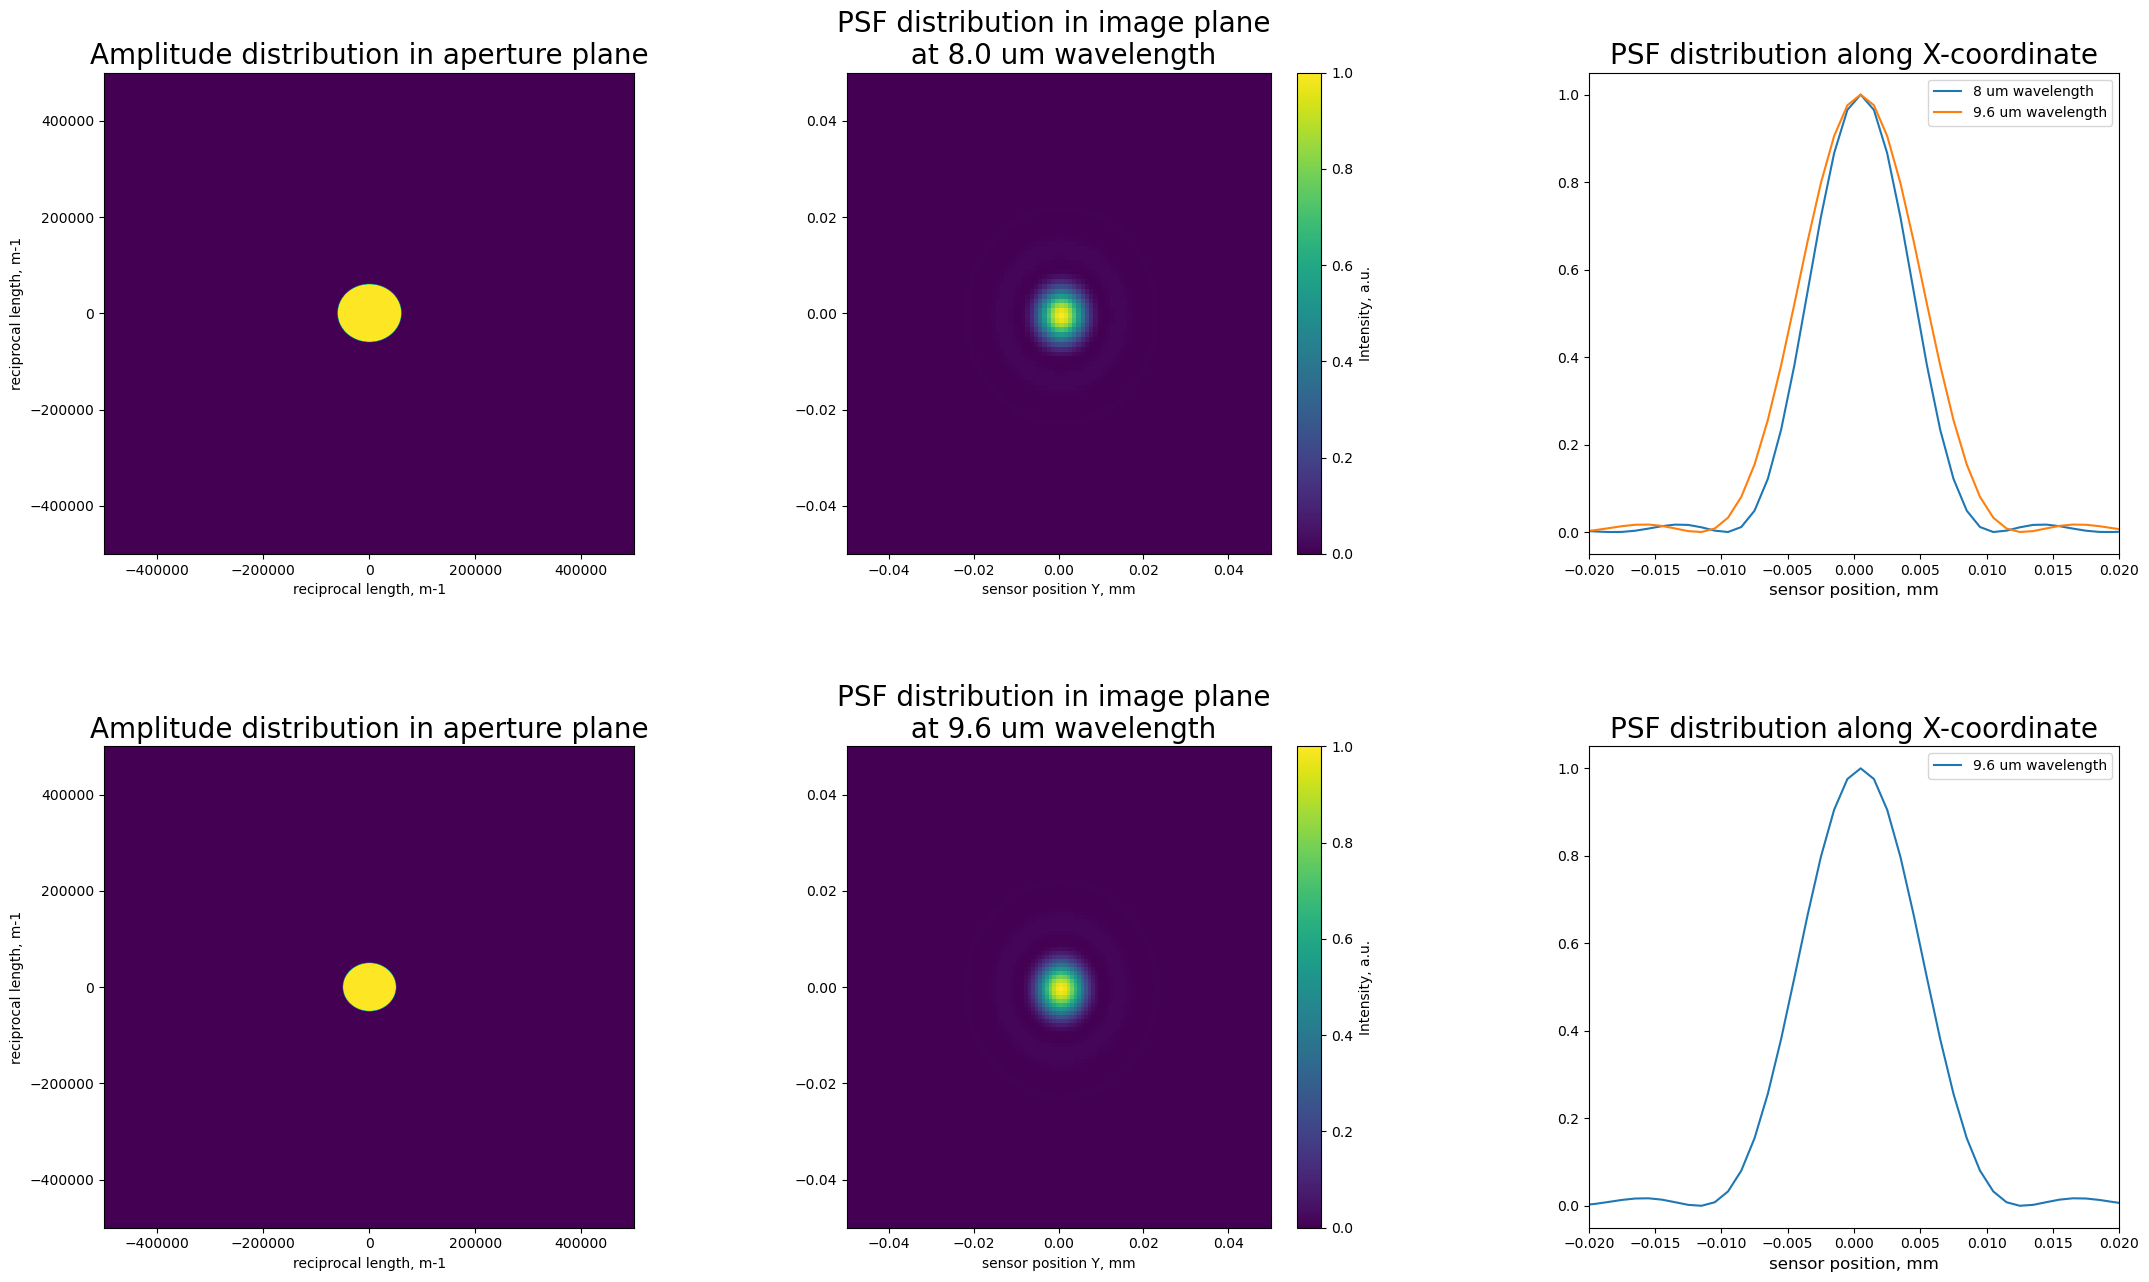

In [2]:
fig, (axs) = plt.subplots(2, 3, figsize=(26, 15), sharey=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)
labels_size = 12

imr1 = axs[0][0].imshow(np.abs(Ha1), extent = [fu1_x[-1] , fu1_x[0], fu1_x[-1] , fu1_x[0]], aspect = 'auto')
axs[0][0].set_xlabel('reciprocal length, m-1')
axs[0][0].set_ylabel('reciprocal length, m-1')
# fig.colorbar(imr1, ax = axs[0], label = 'Intensity, a.u.')
axs[0][0].set_title('Amplitude distribution in aperture plane', fontsize = 20)
              
imr2 = axs[1][0].imshow(np.abs(Ha2), extent = [fu2_x[-1] , fu2_x[0], fu2_x[-1] , fu2_x[0]], aspect = 'auto')
axs[1][0].set_xlabel('reciprocal length, m-1')
axs[1][0].set_ylabel('reciprocal length, m-1')
axs[1][0].set_title('Amplitude distribution in aperture plane', fontsize = 20)

imr3 = axs[0][1].imshow(PSF1, extent = [1e3 * u1[0], 1e3 * u1[-1], 1e3 * u1[0] , 1e3 * u1[-1]], aspect = 'auto', vmin = 0, vmax = 1)
axs[0][1].set_xlim((-50 * 1e3 * param_dict1['du'], 50 * 1e3 * param_dict1['du']))
axs[0][1].set_ylim((-50 * 1e3 * param_dict1['du'], 50 * 1e3 * param_dict1['du']))
axs[0][1].set_xlabel('sensor position X, mm')
axs[0][1].set_xlabel('sensor position Y, mm')
fig.colorbar(imr3, ax = axs[0][1], label = 'Intensity, a.u.')
axs[0][1].set_title(f'PSF distribution in image plane \n at {1e6 * param_dict1["wvl"]} um wavelength', fontsize = 20)

imr4 = axs[1][1].imshow(PSF2, extent = [1e3 * u1[0], 1e3 * u1[-1], 1e3 * u1[0] , 1e3 * u1[-1]], aspect = 'auto', vmin = 0, vmax = 1)
axs[1][1].set_xlim((-50 * 1e3 * param_dict1['du'], 50 * 1e3 * param_dict1['du']))
axs[1][1].set_ylim((-50 * 1e3 * param_dict1['du'], 50 * 1e3 * param_dict1['du']))
axs[1][1].set_xlabel('sensor position X, mm')
axs[1][1].set_xlabel('sensor position Y, mm')
fig.colorbar(imr4, ax = axs[1][1], label = 'Intensity, a.u.')
axs[1][1].set_title(f'PSF distribution in image plane \n at {1e6 * param_dict2["wvl"]} um wavelength', fontsize = 20)

axs[0][2].plot(1e3 * u1, PSF1[centre_coord1][:], label = '8 um wavelength')
axs[0][2].plot(1e3 * u2, PSF2[centre_coord2][:], label = '9.6 um wavelength')
axs[0][2].set_xlim((-20 * 1e3 * param_dict1['du'], 20 * 1e3 * param_dict1['du']))
axs[0][2].set_xlabel('sensor position, mm', fontsize=12)
axs[0][2].set_title('PSF distribution along X-coordinate', fontsize = 20)
axs[0][2].legend()

axs[1][2].plot(1e3 * u2, PSF2[centre_coord2][:], label = '9.6 um wavelength')
axs[1][2].set_xlim((-20 * 1e3 * param_dict1['du'], 20 * 1e3 * param_dict1['du']))
axs[1][2].set_xlabel('sensor position, mm', fontsize=12)
axs[1][2].set_title('PSF distribution along X-coordinate', fontsize = 20)
axs[1][2].legend()

### Image construction w/o aberrations case

In [3]:
num_pixels = num_pix1
image = ImageOps.grayscale(Image.open('scene.png'))                   # grayscaling loaded image 
im = image.resize((num_pixels,num_pixels))                            # resizing image
Ig = (im/(np.max(im))).astype(np.float32)                             # normalizing image 
PSF1 = PSF1.astype(np.float32)
z = np.fft.irfft2(np.fft.rfft2(Ig) * np.fft.rfft2(PSF1, Ig.shape))    # convolution
z = np.fft.fftshift(z)                                                # shifting

# normalizing scene image for a different shape due to different wavelength
num_pixels = num_pix2
image = ImageOps.grayscale(Image.open('scene.png'))                   # grayscaling loaded image 
im = image.resize((num_pixels,num_pixels))                            # resizing image
Ig2 = (im/(np.max(im))).astype(np.float32)                            # normalizing image 
  

Text(0.5, 1.0, 'scene reconstructed')

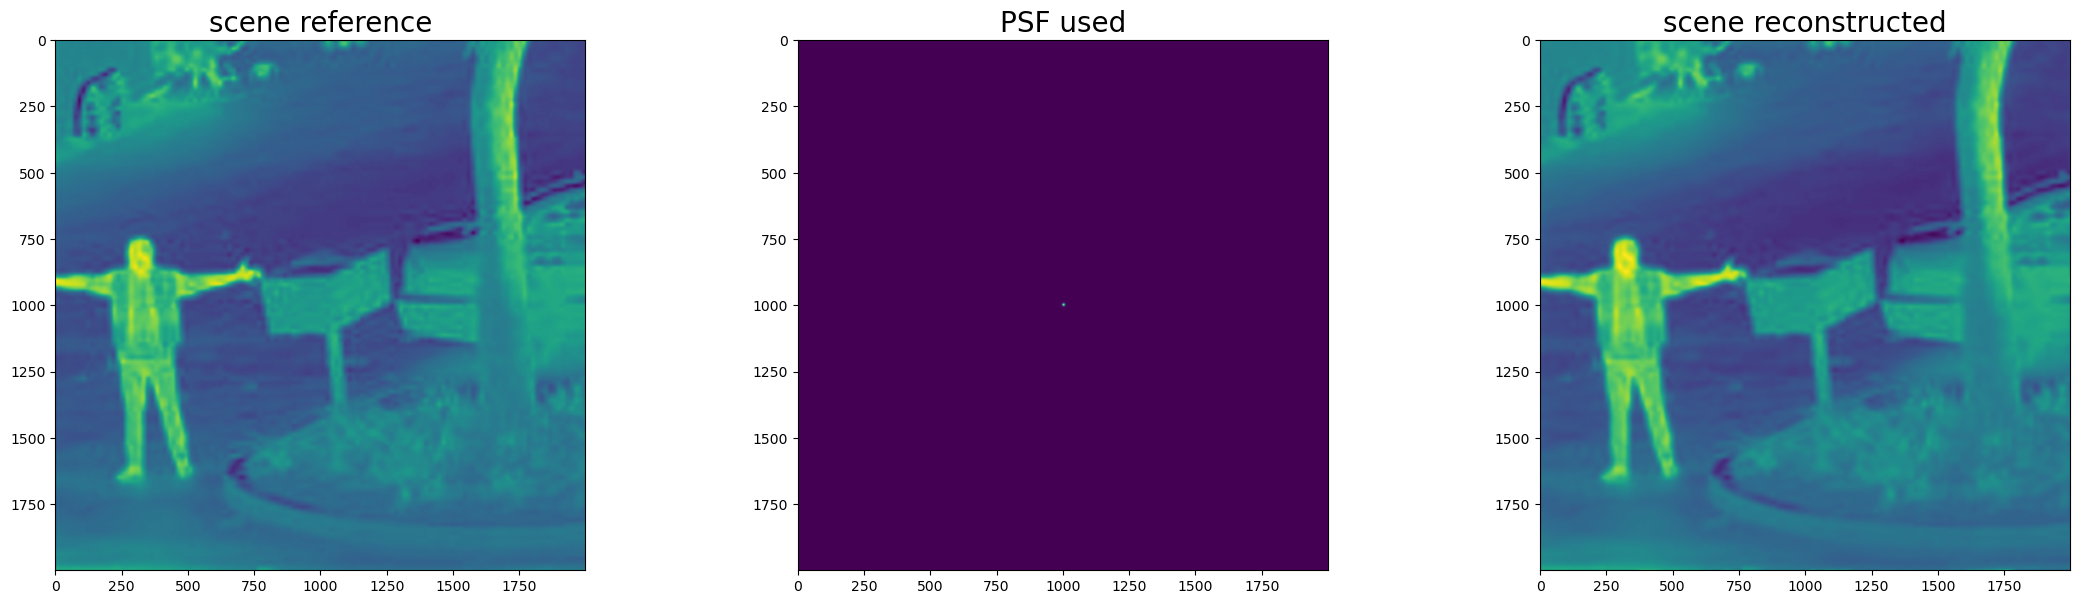

In [4]:
fig, (axs) = plt.subplots(1, 3, figsize=(26, 15), sharey=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)
labels_size = 12

axs[0].imshow(Ig)
axs[1].imshow(PSF1)
axs[2].imshow(z)

axs[0].set_title('scene reference', fontsize = 20)
axs[1].set_title('PSF used', fontsize = 20)
axs[2].set_title('scene reconstructed', fontsize = 20)

#### Update PSF via real aberrations introduction

#### Real phase differences obtained via meta lens simulation (expressed in wavenumber units)

In [5]:
wvl_8 = [2.0306193785455693, 0.3747395241414218, -0.16212422883843675, 0.1520724689850449, 0.38003847309584265, -2.6679704097480244, 
        1.9222174477149203, 0.7032032121858962, 1.4141553869072383, -1.0342060699427527, 0.5431068617241189, -0.5879151659870623, 
        2.942938197456808, 0.7963823738702184, -2.262966927341405, -2.503827378093859, 1.1010128833033606, 2.43742011976712, -0.9190577485353834, 
        2.667112293510597, 1.6698201229622838, 2.155283252505313, -2.6149026303304046, 0.4468468745280257, -2.3795181132415943, 0.20622464702371174, 
        -3.1312930202875475, 0.854575836514132, 2.3207156238268585, -1.9683655539100011, 0.47448304185153023, -2.8752495909790543, -0.2981216157747794, 
        -1.9634386915971733, 0.5121202294373591, -2.3172091059949107, 1.2177701580527502, -1.1280139390463868, -0.04741929261814787, 1.4845815996932756, 
        0.5314678433084412, 2.0736899187704525, 0.3678284379468523, -2.6740267046392154, 1.7425577353564279, -2.3317300923083755, -0.28700279893658565, 
        3.113105293092027, 2.2577534744451047, 0.17747940111696062, -2.5647745510012827, 3.141592653589793, -1.6553699676731237, 1.1689598520145432, 
        -2.568314149226105, 1.734743857486715, -1.9804950463043323, -0.8263012949440955, 1.5163844437916618, -2.2035030958804893, 0.4701478157244775, 
        -2.875910384206464, -1.9780427937822793, 0.7986912480471957, -2.697346421381741, -1.913570565510873, 0.34322218512462, 0.604174423129891, 0.14343493972421986, 
        0.7818231693533502, -2.6419923748742913, -2.390533615412803, -0.34419245056560666, 1.097540539094457, -0.6316476127815663, 0.8970834479917525, 
        -0.11053992767327256, -2.8065825830365987, 2.479434324585056, -2.2820899334671467, 2.208659915803848, 0.4774516164431436, 2.739408440205789, 
        -2.7591659168481426, -0.3691901881108059, -0.284195774972847, -0.7263508287526266, 1.4698913611519482, -0.1983113335487703, -1.9584469467777572, 
        0.3761930571691017, 2.227433381795605, -3.1135278462179485, -2.202355835061782, 0.20722984407778033, -0.5604311705650191, 1.5033754037323563, 
        0.09431027919738597, 2.157563103712451, 1.1880971579461648, 3.0181938907710775, 0.7169025143719298, -0.03287949184880219, 0.5635656747176327, 1.0768160006239407, 
        3.0959642307954525, -2.8838620921712153, -2.783358713679165, -2.6826583177287517, -0.9622135170843947, 0.5150794150094051, -0.8604468365170285, 
        2.1239616284825904, -0.04825775303417816, -0.7962430489556812, -1.3713427494669597, -1.9823525446247658, -2.3283132360909122, -0.05220284519202211, 
        -0.24487787028544636, 1.3281040886362796]

wvl_96 = [1.4706934619547103, -1.3266624033418082, -2.738249226123357, -0.82738712615777, -2.490063662511237, -1.0144091097520822, 
         -0.06743341870877102, -0.9724661351827646, -2.784226336413442, 1.7675496170075669, -1.0054551652804005, -2.1145185241192577, 
         2.205351498101978, 1.316464026596781, -0.7269179405305207, -1.1113138131530433, 1.247616316034145, 1.9543569230772686, 0.8651596844450999, 
         -0.6545228273473072, 1.6655799697897566, 1.7844358613375952, -2.0314342070754816, -1.2467202309611891, -0.730259365067134, 2.6749545517410285, 
         -2.7137391101215322, -0.7929989586415248, 1.9392431875693614, -2.0228453280965457, 1.501104082173672, -0.6884055634525619, -1.7991188001055145, 
         -2.697063239279828, -1.89198348892532, -0.7106557003554024, -1.0958071683577362, 1.481044739382999, -3.088823583767355, -2.874750985174483, 
         1.5177088425939473, -2.121602277684849, -2.527805907969077, -0.5234310227105891, -1.8246199727815913, -1.47164191569538, -0.980080338459107, 
         2.5288113007850623, 1.8788425205770114, 1.4216522508787026, -1.6824866824097229,-1.1384235826123963, -0.06754741859055757, -0.7525547249066608, 
         -2.238337044616009, 2.3781908258486246, -0.25447852954317457, 2.7682101715959635, -0.8796184069821943, -2.7579558413406526, 2.206943151008025, 
         -1.102873339295924, -0.7077629253368349, -0.5502705030448768, -1.2367573977442037, 2.549602070033951, 0.6282618564155742, -1.1587753141968138, 
         -0.7572127075042874, -0.4897059247798829, 2.2515046041920783, 2.4401422361737333, 2.540640790712955, -0.005133773794250827, -0.5249725979742588, 
         1.8635042683684522, -2.0813154470394775, -1.6540298447384039, 0.42445252184091126, 2.77713805739765, -0.8670621280703609, 1.862535457472877, 
         -0.47834178102928115, -2.1295775022421397, -3.0973406475076426, 2.254334094683844, 2.2693415715196648, 0.6873349601305206, 2.1507482999221215, 
         -1.3240774913166338, 3.06562919791166, 2.308555109186514, -0.8967732444693655, -2.7283855721774426, -2.2763764062137892, 1.396069470966875, 
         -1.7012521661344768, -1.2440835855466283, 2.9753031606187075, -0.917079588171211, 1.3660445981271472, -2.521674690275877, -1.0892691393539091, 
         -0.2403125816846091, 1.7114178730973648, 2.0949008744629998, -0.4788325203739141, -0.5278260505580046, -0.41961732970726295, -1.4537435591144567, 
         -2.2785439386056594, 1.7762567957435662, 3.05278289954131, 2.392481925179727, 2.94248146625182, 3.102977571061957, -2.9344094869916555, -0.47254384104527214, 
         -0.6045733912528499, -0.18987152675553076, -0.21176695922450298]
wvl_8 = [i + np.pi for i in wvl_8]
wvl_96 = [i + np.pi for i in wvl_96]

In [9]:
phase_difference_8 = [wvl1 * i/(2*np.pi) for i in wvl_8]                                              # phase difference between ideal one (related to aberration-free case) and simulated one
phase_difference_8 = np.asarray(phase_difference_8)

phase_difference_9p6 = [wvl2 * i/(2*np.pi) for i in wvl_96]                                            # phase difference between ideal one (related to aberration-free case) and simulated one
phase_difference_9p6 = np.asarray(phase_difference_9p6)

phase_difference_8 = aux_funcs.get_2d_rotated(phase_difference_8, num_pix1)
Wa1_r, Ha1_r, PSF1_r, u1_r, fu1_x_r  = aux_funcs.get_normalized_psf(param_dict1, phase_difference_8)             # wavefront, coherent transfer function (CTF), PSF, coordinates in image plane, coordinates in aperture plane in reciprocal space

phase_difference_9p6 = aux_funcs.get_2d_rotated(phase_difference_9p6, num_pix2)
Wa2_r, Ha2_r, PSF2_r, u2_r, fu2_x_r  = aux_funcs.get_normalized_psf(param_dict2, phase_difference_9p6)             # wavefront, coherent transfer function (CTF), PSF, coordinates in image plane, coordinates in aperture plane in reciprocal space

PSF1_r = PSF1_r.astype(np.float32)
z1_r = np.fft.irfft2(np.fft.rfft2(Ig) * np.fft.rfft2(PSF1_r, Ig.shape))    # convolution
z1_r = np.fft.fftshift(z1_r)                                                # shifting

PSF2_r = PSF2_r.astype(np.float32)
z2_r = np.fft.irfft2(np.fft.rfft2(Ig2) * np.fft.rfft2(PSF2_r, Ig2.shape))    # convolution
z2_r = np.fft.fftshift(z2_r)                                                # shifting

# getting integrals

int1 = np.sum(PSF1)
int2 = np.sum(PSF1_r)
int3 = np.sum(PSF2_r)

PSF1/=int1
PSF1_r/=int2
PSF2_r/=int3

### Plotting

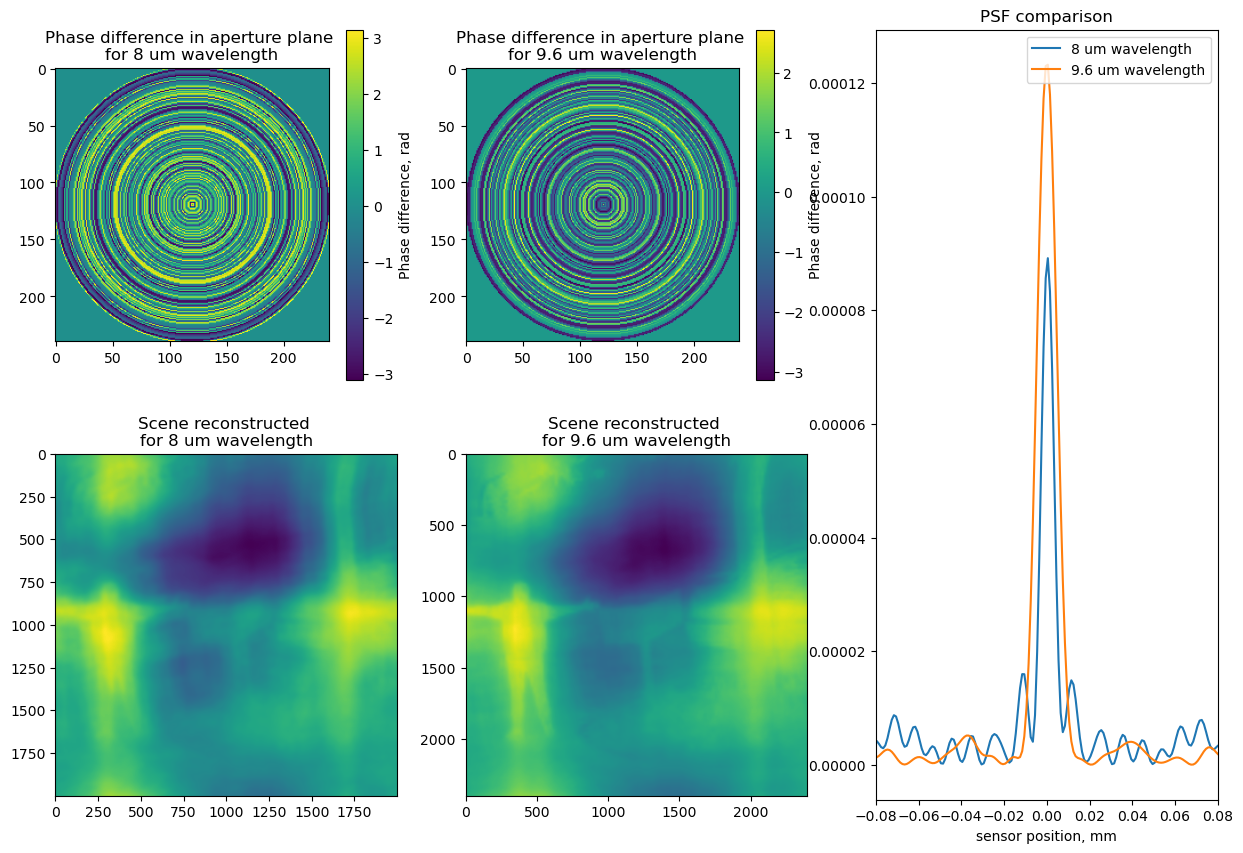

In [11]:
fig, (axs) = plt.subplots(2, 3, figsize=(15, 10), sharey=False)
ax1 = plt.subplot2grid((2, 3), (0, 0))
ax2 = plt.subplot2grid((2, 3), (0, 1))
ax3 = plt.subplot2grid((2, 3), (1, 0))
ax4 = plt.subplot2grid((2, 3), (1, 1))
ax5 = plt.subplot2grid((2, 3), (0, 2), rowspan=2)

slice_1 = slice(centre_coord1 - ma_num_r, centre_coord1 + ma_num_r)
slice_2 = slice(centre_coord2 - ma_num_r, centre_coord2 + ma_num_r)

imr1 = ax1.imshow(np.angle(Ha1_r)[slice_1,slice_1])
fig.colorbar(imr1, ax = ax1, label = 'Phase difference, rad')
ax1.set_title('Phase difference in aperture plane \nfor 8 um wavelength')

imr2 = ax2.imshow(np.angle(Ha2_r)[slice_2,slice_2])
fig.colorbar(imr2, ax = ax2, label = 'Phase difference, rad')
ax2.set_title('Phase difference in aperture plane \nfor 9.6 um wavelength')

ax3.imshow(z1_r)
ax3.set_title('Scene reconstructed \nfor 8 um wavelength')

ax4.imshow(z2_r)
ax4.set_title('Scene reconstructed \nfor 9.6 um wavelength')

# ax5.plot(1e3 * u1, PSF1[centre_coord1][:], label = '8 um wavelength - no aberrations')
ax5.plot(1e3 * u1, PSF1_r[centre_coord1][:], label = '8 um wavelength')
ax5.plot(1e3 * u2, PSF2_r[centre_coord2][:], label = '9.6 um wavelength')
ax5.set_xlim((-80 * 1e3 * param_dict1['du'], 80 * 1e3 * param_dict1['du']))
ax5.set_title('PSF comparison')
ax5.set_xlabel('sensor position, mm')
ax5.legend()


#### Demonstration of effect of aberrations on PSF in comparison with exemplary one - defocus

In [126]:
aberrations_dict1 = {'wd':1*wvl1, 'w040':0, 'w131':0, 'w222':0, 'w220':0,'w311':0}                         # some aberration present #1
aberrations_dict2 = {'wd':2*wvl1, 'w040':0, 'w131':0, 'w222':0, 'w220':0,'w311':0}                           # some aberration present #2

Wa1_1, Ha1_1, PSF1_1, u1, fu1_x  = aux_funcs.get_normalized_psf(param_dict1, aberrations_dict1) 
Wa1_2, Ha1_2, PSF1_2, u1, fu1_x  = aux_funcs.get_normalized_psf(param_dict1, aberrations_dict2) 

test_ample = np.abs(Ha1_2)
test_phase = test_ample * Wa1_2

Wa1_x, Ha1_x, PSF1_x, u1, fu1_x  = aux_funcs.get_normalized_psf(param_dict1, test_phase) 
Wa1_r, Ha1_r, PSF1_r, u1, fu1_x  = aux_funcs.get_normalized_psf(param_dict1, phase_difference_8) 

### PLOTTING

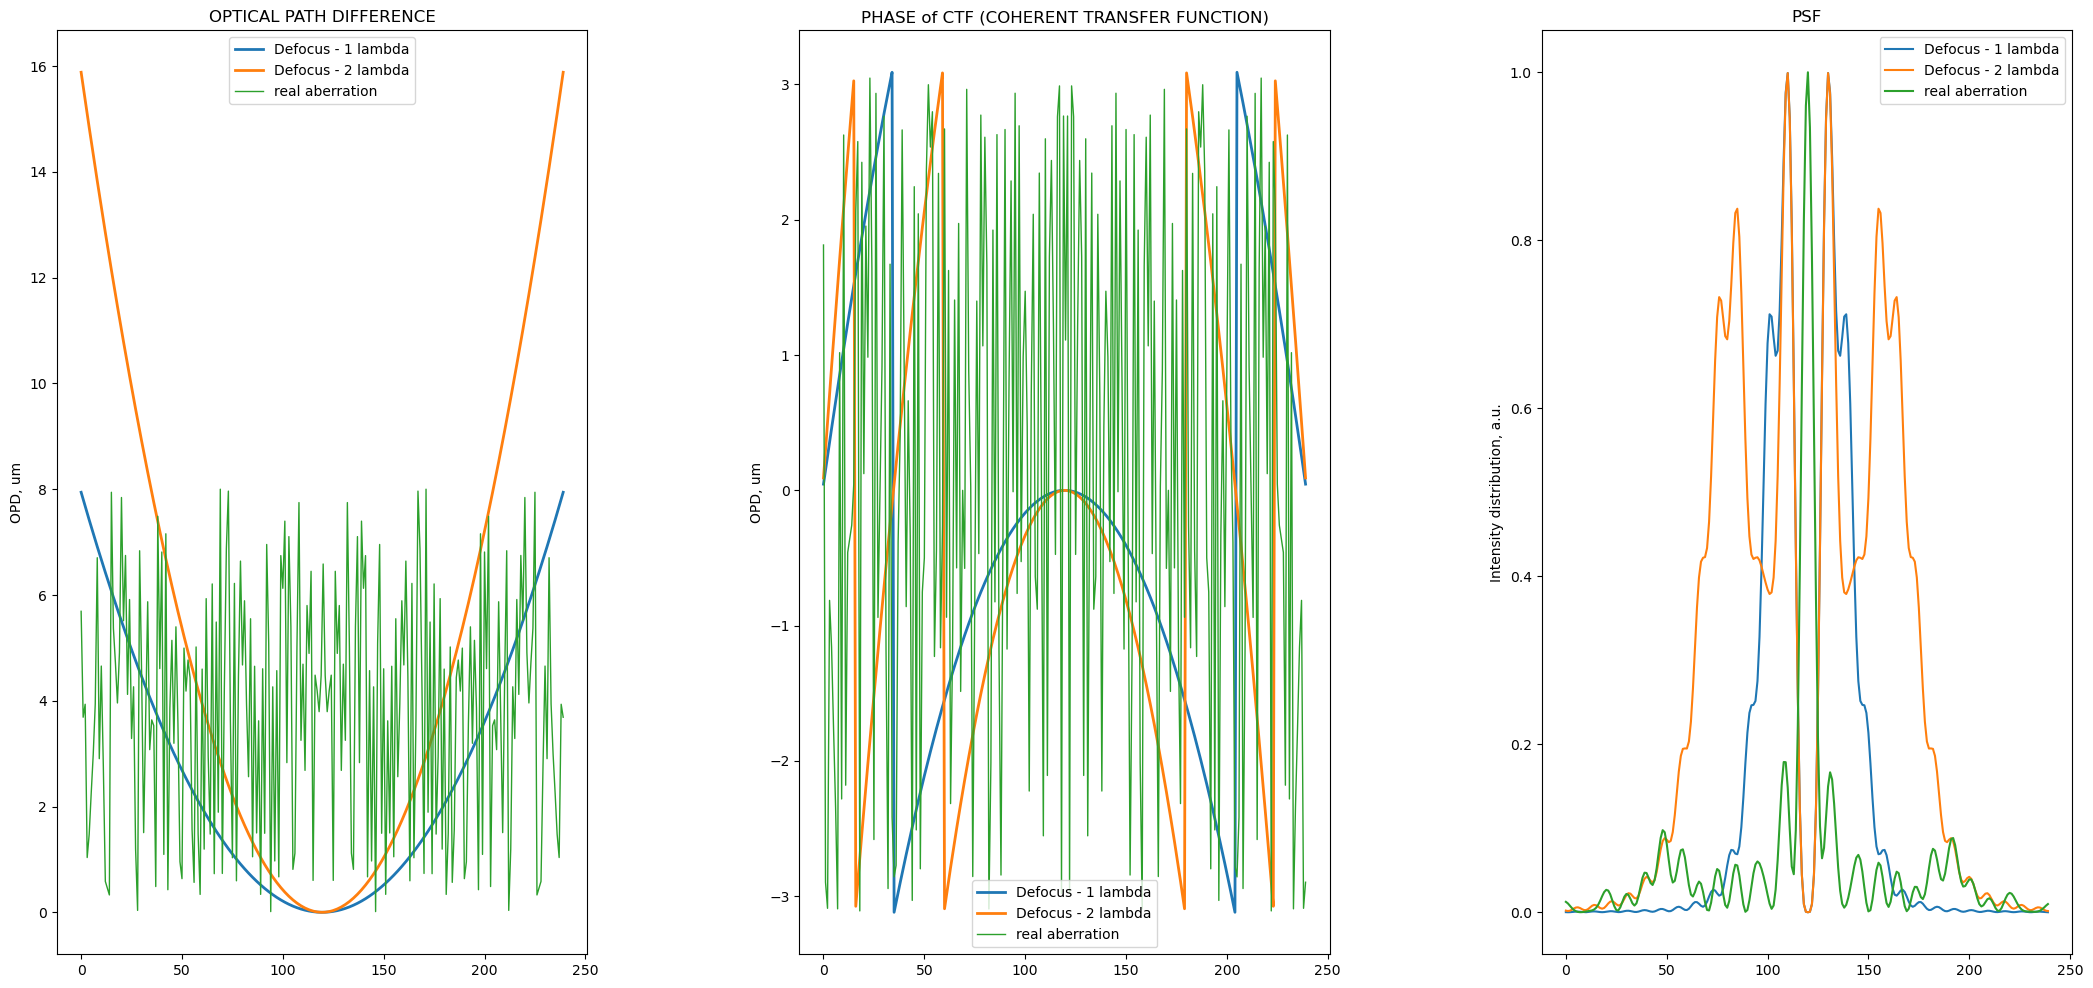

In [133]:
fig, (axs) = plt.subplots(1, 3, figsize=(26, 12), sharey=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)
labels_size = 12

slice_1 = slice(centre_coord1 - ma_num_r, centre_coord1 + ma_num_r)

axs[0].plot(1e6 * Wa1_1[centre_coord1,slice_1], linewidth = 2, label = 'Defocus - 1 lambda')
axs[0].plot(1e6 * Wa1_2[centre_coord1,slice_1], linewidth = 2,  label = 'Defocus - 2 lambda')
axs[0].plot(1e6 * Wa1_r[centre_coord1,slice_1], linewidth = 1,  label = 'real aberration')
axs[0].set_ylabel('OPD, um')
axs[0].set_title('OPTICAL PATH DIFFERENCE')
axs[0].legend()

axs[1].plot(np.angle(Ha1_1[centre_coord1,slice_1]), linewidth = 2,  label = 'Defocus - 1 lambda')
axs[1].plot(np.angle(Ha1_2[centre_coord1,slice_1]), linewidth = 2,  label = 'Defocus - 2 lambda')
axs[1].plot(np.angle(Ha1_r[centre_coord1,slice_1]), linewidth = 1,  label = 'real aberration')
axs[1].set_ylabel('OPD, um')
axs[1].set_title('PHASE of CTF (COHERENT TRANSFER FUNCTION)')
axs[1].legend()

axs[2].plot(PSF1_1[centre_coord1,slice_1], label = 'Defocus - 1 lambda')
axs[2].plot(PSF1_2[centre_coord1,slice_1], label = 'Defocus - 2 lambda')
axs[2].plot(PSF1_r[centre_coord1,slice_1], label = 'real aberration')
axs[2].set_ylabel('Intensity distribution, a.u.')
axs[2].set_title('PSF')
axs[2].legend()





### Test to erase

(200.0, 300.0)

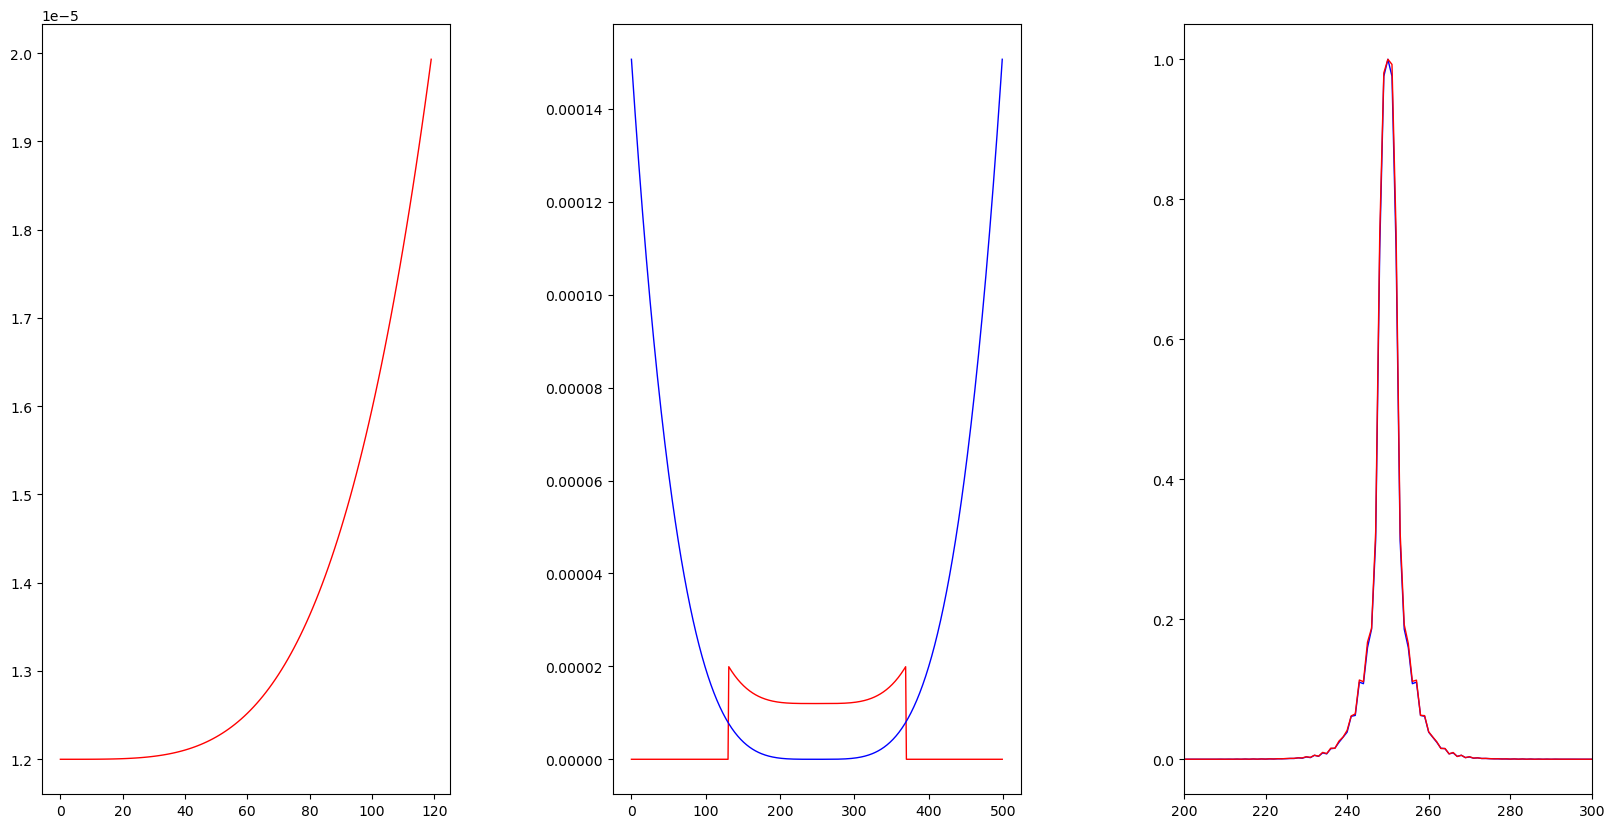

In [16]:
aberrations_dict1 = {'wd':0, 'w040':wvl1, 'w131':0, 'w222':0, 'w220':0,'w311':0}                         # some aberration present #1

Wa1_1, Ha1_1, PSF1_1, u1, fu1_x  = aux_funcs.get_normalized_psf(param_dict1, aberrations_dict1) 

test_ample = np.abs(Ha1_1)
test_phase = test_ample * Wa1_1
test_phase+=1.5 * wvl1
test_phase[25:30,25:30] = 2*wvl1

test_phase = test_phase[centre_coord1, centre_coord1:centre_coord1 + int(0.5 * apert_pix1)]
# test_phase[0:40] = 6*wvl1

phase_difference = aux_funcs.get_2d_rotated(test_phase, num_pix1)

Wa1_c, Ha1_c, PSF1_c, u1, fu1_x  = aux_funcs.get_normalized_psf(param_dict1, phase_difference) 

fig, (axs) = plt.subplots(1, 3, figsize=(20, 10), sharey=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)
labels_size = 12

axs[0].plot(test_phase, linewidth = 1, color = 'r')
# axs[0].plot(tst_check)

axs[1].plot(phase_difference[centre_coord1,:], linewidth = 1, color = 'r')
axs[1].plot(Wa1_1[centre_coord1,:], linewidth = 1, color = 'b')
# axs[0].set_xlim([200,300])

axs[2].plot(PSF1_1[centre_coord1,:], linewidth = 1, color = 'b')
axs[2].plot(PSF1_c[centre_coord1,:], linewidth = 1, color = 'r')
axs[2].set_xlim([200,300])